In [2]:
import torch
from diffusers import DiffusionPipeline, DPMSolverMultistepScheduler
from diffusers.utils import export_to_video
import cv2

/home/omnissiah/miniconda3/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2024-10-28 12:21:50.133478: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-10-28 12:21:51.353111: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [3]:
pipe = DiffusionPipeline.from_pretrained("damo-vilab/text-to-video-ms-1.7b", torch_dtype=torch.float16, variant="fp16")
pipe.scheduler = DPMSolverMultistepScheduler.from_config(pipe.scheduler.config)
pipe = pipe.to('cuda')


Loading pipeline components...: 100%|██████████| 5/5 [00:01<00:00,  4.39it/s]


In [49]:
path = ['/home/omnissiah/Minor/minor_project/models/asd.mp4']


In [17]:
prompt = "horse riding"
video_frames = pipe(prompt, num_inference_steps=24, num_frames=20).frames

100%|██████████| 24/24 [05:57<00:00, 14.88s/it]


In [15]:
video_frames.shape

(1, 20, 256, 256, 3)

In [16]:
import os
os.environ["IMAGEIO_FFMPEG_EXE"] = "/usr/bin/ffmpeg"

video_path = export_to_video(video_frames[0],output_video_path='/home/omnissiah/Minor/minor_project/models/asd.mp4')

path.append(video_path)

video_path

'/home/omnissiah/Minor/minor_project/models/asd.mp4'

In [14]:
plot = {}

In [51]:
import numpy as np
import copy

for i,j in enumerate(path):
    video = cv2.VideoCapture(j)
    
    a = True
    idx = 0
    temp = []
    while a:
        a,image = video.read()
        temp.append(image)
    plot[i] = copy.deepcopy(temp)

plot

{0: [array([[[161, 137, 117],
          [161, 137, 117],
          [161, 137, 117],
          ...,
          [160, 136, 111],
          [160, 136, 111],
          [160, 136, 111]],
  
         [[162, 138, 118],
          [162, 138, 118],
          [162, 138, 118],
          ...,
          [160, 136, 111],
          [160, 136, 111],
          [160, 136, 111]],
  
         [[162, 138, 118],
          [162, 138, 118],
          [161, 137, 117],
          ...,
          [160, 136, 111],
          [160, 136, 111],
          [160, 136, 111]],
  
         ...,
  
         [[ 96, 171, 150],
          [ 95, 170, 149],
          [ 93, 168, 147],
          ...,
          [ 80, 152, 134],
          [ 79, 151, 133],
          [ 84, 156, 138]],
  
         [[ 91, 166, 145],
          [100, 175, 154],
          [100, 175, 154],
          ...,
          [ 80, 152, 134],
          [ 80, 152, 134],
          [ 95, 167, 149]],
  
         [[ 86, 161, 140],
          [ 96, 171, 150],
          [ 99, 174, 

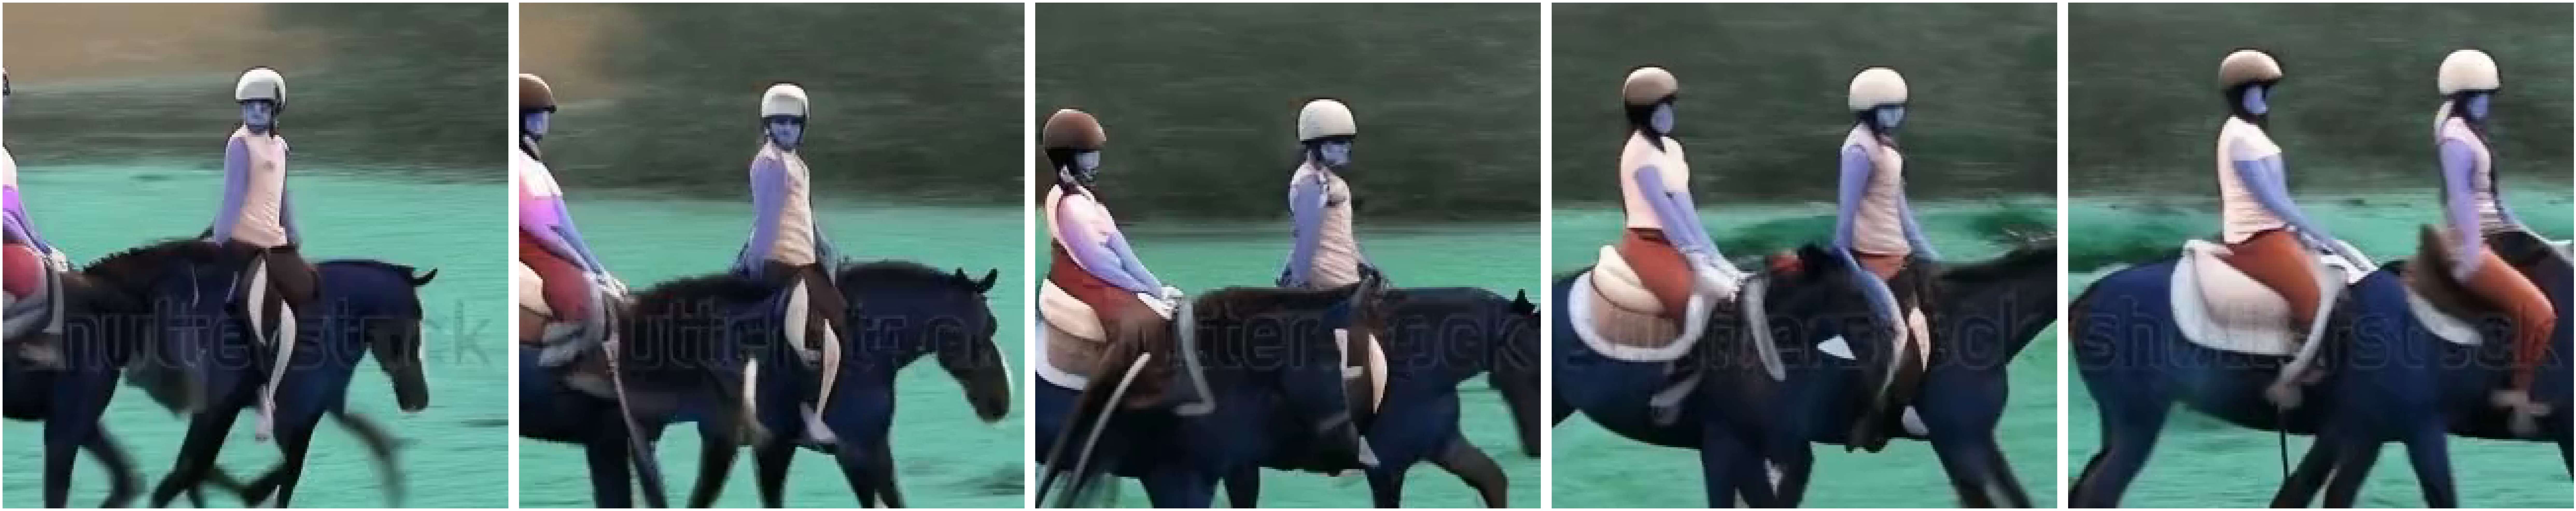

In [52]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(100, 100))
idx = 0
for i in range(12,20):
    axes[idx].imshow(plot[0][i])
    axes[idx].axis('off')
    
    idx+=1
    if idx==5: break  
    
plt.tight_layout(pad=3)
plt.show()
